請先準備一張圖片並存放在colab(或其他你使用的環境)，並將"/kaggle/input/shiba-meme/2025-07-22 103452.png"改成自己的圖片在colab中的路徑才能運行程式碼。

## **第一章:圖片的本質是矩陣:**

首先從最基本的開啟並分析圖片看起，慢慢進入圖片的本質:

In [30]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# 讀入圖片
img = Image.open("/kaggle/input/shiba-meme/2025-07-22 103452.png")

# 查看圖片基本資訊
print("圖片格式:", img.format)
print("圖片尺寸 (寬, 高):", img.size)
print("圖片色彩模式:", img.mode)

圖片格式: PNG
圖片尺寸 (寬, 高): (210, 201)
圖片色彩模式: RGBA


In [32]:
# 轉成 NumPy 陣列
img_array = np.array(img)

# 顯示陣列的形狀
print("圖片陣列 shape:", img_array.shape)

# 顯示前 5 個像素資料（數值）
print("前幾個像素資料:\n", img_array[0:5, 0:5, :])

圖片陣列 shape: (201, 210, 4)
前幾個像素資料:
 [[[ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]]

 [[ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]]

 [[ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]]

 [[ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]]

 [[ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]
  [ 31  31  31 255]]]


從輸出結果可以看到，圖片果真是由array所組成，每一個像素皆是\[r,g,b,a(透明度)]的矩陣，更圖像化一點，即是類似下述舉例這樣(容我偷懶一點，下面舉的是jpg檔的例子):

img_array = \[

  \[ \[255, 0, 0], \[0, 255, 0], \[0, 0, 255] ],
  
  \[ \[255,255,0], \[255,255,255], \[0,0,0] ],
  
  \[ \[255,128,0], \[128,0,255], \[64,64,64] ]
  
]


由於我自己實際上傳的是png檔，所以有透明度值，如為jpg則沒有，如為灰階圖則只有高、寬雙通道。

我們可以看到shape表示的即為(高像素數、寬像素數、通道數)，而一般來說，這張圖片的具象化就是把每個像素的r值提取出來，成為r的新矩陣，稱為r通道，g、b、a也一樣，共四個通道，四"片"矩陣構成三維的總矩陣，可以想像成這張圖片的顯色是由紅、綠、藍玻璃紙及濾光片疊加而成，讓我們將每個通道逐一顯示:

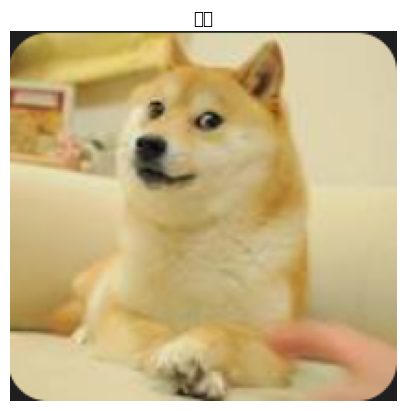

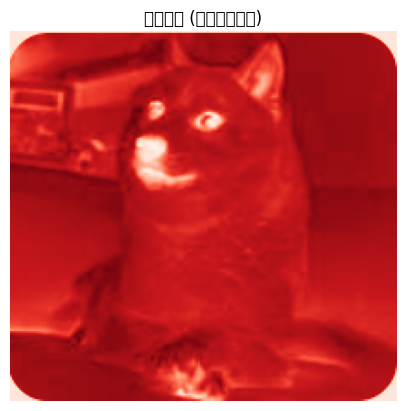

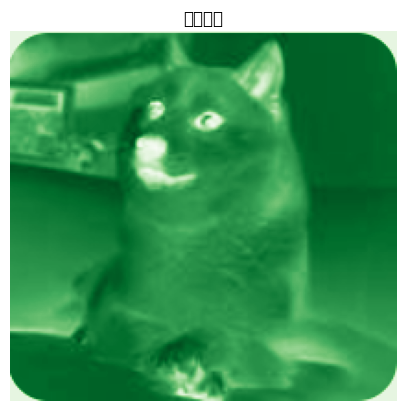

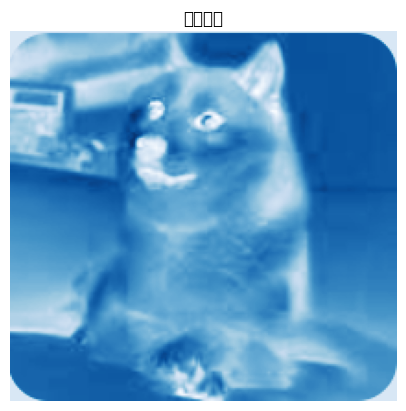

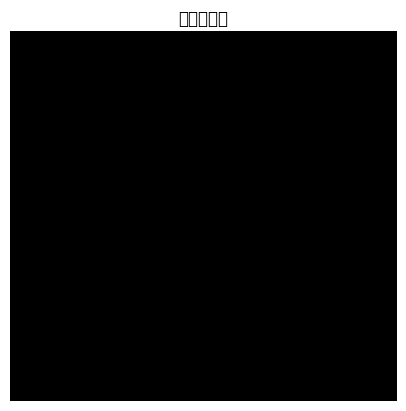

In [18]:
# 顯示原圖
plt.imshow(img_array)
plt.title("原圖")
plt.axis("off")
plt.show()

# 顯示紅色通道（R）
plt.imshow(img_array[:, :, 0], cmap="Reds")
plt.title("紅色通道 (只看紅光強度)")
plt.axis("off")
plt.show()

# 顯示綠色通道（G）
plt.imshow(img_array[:, :, 1], cmap="Greens")
plt.title("綠色通道")
plt.axis("off")
plt.show()

# 顯示藍色通道（B）
plt.imshow(img_array[:, :, 2], cmap="Blues")
plt.title("藍色通道")
plt.axis("off")
plt.show()

# 顯示透明通道（A）
plt.imshow(img_array[:, :, 3], cmap="gray")
plt.title("透明度通道")
plt.axis("off")
plt.show()

## **第二章:調整圖片的花招:**

* 調亮度
* 轉灰階、全黑白
* 調整尺寸（resize）
* 裁切、旋轉、翻轉
* 快速檢查圖片尺寸（適用於大量圖片）

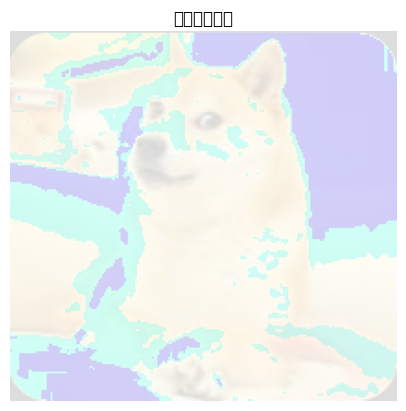

In [16]:
#調亮度:以整張亮度加50為例

brighter = np.clip(img_array + 50, 0, 255).astype('uint8')  # 防止超出範圍
plt.imshow(brighter)
plt.title("變亮後的圖片")
plt.axis('off')
plt.show()

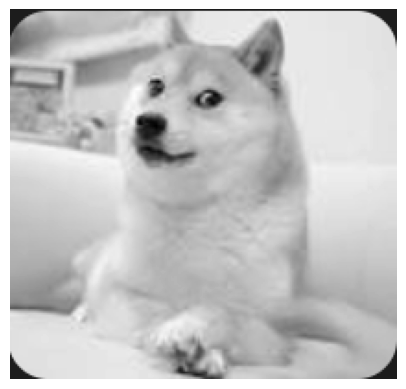

In [22]:
#轉灰階:
from PIL import Image, ImageOps

gray_img = ImageOps.grayscale(img)

plt.imshow(gray_img, cmap='gray')
plt.axis("off")
plt.show()

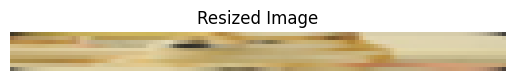

In [6]:
#調整尺寸:

resized_img = img.resize((128, 10))  # 變成 128x10 像素的扁狗狗

plt.imshow(resized_img)
plt.title("Resized Image")
plt.axis("off")
plt.show()

In [7]:
# 裁切區塊（左上角 100x100）
cropped_img = img.crop((0, 0, 100, 100))

# 旋轉圖片
rotated_img = img.rotate(45)  # 順時針 45 度

# 左右翻轉
flipped_img = img.transpose(Image.FLIP_LEFT_RIGHT)

#容我偷懶，plt.show()的部分想看的話各位自行嘗試吧!

In [9]:
#利用path和glob函式搭配迴圈，快速檢查圖片尺寸:
#（適用於大量圖片，日後也可做其他應用）

from pathlib import Path

folder = Path("/kaggle/input/shiba-meme")

for img_path in folder.glob("*.png"):
    try:
        img = Image.open(img_path)
        print(f"{img_path.name}: {img.size}")
    except:
        print(f"{img_path.name}:無法開啟")

2025-07-22 103452.png: (210, 201)


.glob() 是一種「萬用字元搜尋」，像上述直接寫在for迴圈中，可以構成威力強大的資料尋找器，常見的格式：

* *.jpg：找所有 jpg 檔

* \*cat*.jpg：找檔名包含 "cat" 的 jpg

* **/*.jpg：遞迴地找所有子資料夾內的 jpg（更進階）

## **第三章:調整圖片的花招(進階):**

第二章主要是直接套函式，方便，卻如同黑箱作業，因為一個函式只有一種功能。而第三章我們要直接調整像素，並套用我們自訂的公式!

用Numpy編輯像素，以下列為例:
* 灰階pro
* 二元化成全黑全白

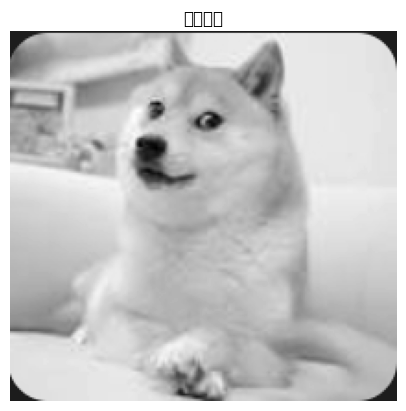

In [24]:
#轉成灰階（用 NumPy）
#公式：灰階 = 0.3*R + 0.59*G + 0.11*B

gray = (0.3 * img_array[:, :, 0] + 
        0.59 * img_array[:, :, 1] + 
        0.11 * img_array[:, :, 2]).astype('uint8')

plt.imshow(gray, cmap='gray')
plt.title("灰階圖片")
plt.axis('off')
plt.show()

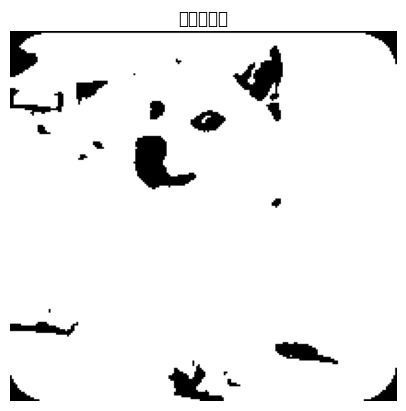

In [29]:
#進一步二元化成全黑全白

threshold = 128  # 亮度界線
binary = (gray > threshold) * 255  
# 由於gray > threshold的話會回傳true(即1)，反之則0，因此大於門檻128為白，小於為黑

plt.imshow(binary, cmap='gray')
plt.title("黑白二值圖")
plt.axis('off')
plt.show()

## **第四章:把畫布分成幾個子圖:**

利用plt.subplot(行數, 列數, 第幾個位置)，可將畫布分為行*列個子圖，至於最後一個數字的意思是"第幾格位置"，是指從左到右、從上到下數的第幾格（從 1 開始），以下的小練習就會用到:




### **小實作練習：**

製作「三色分離圖像牆」，並讀入一張彩色圖片，分離紅、綠、藍通道（每個只保留單一顏色），製作一張 2×2 的圖像牆，內容如下：

\[ 原圖 | 紅色通道圖 ]

\[ 綠色通道圖 | 藍色通道圖 ]

/tmp/ipykernel_36/191861190.py:28: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/191861190.py:28: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/191861190.py:28: UserWarning: Glyph 32005 (\N{CJK UNIFIED IDEOGRAPH-7D05}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/191861190.py:28: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/191861190.py:28: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/191861190.py:28: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_36/191861190.py:28: UserWarning: Glyph 32160 (\N{CJK UNIFIED IDEOGRAPH-7DA0}) missing from current font.
  plt.tight_layout()
/tmp/ipykerne

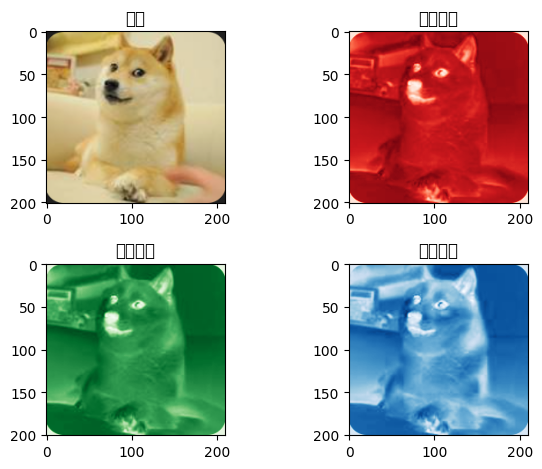

In [37]:
#解答:(從頭寫)

img = Image.open("/kaggle/input/shiba-meme/2025-07-22 103452.png")
img_array = np.array(img)

r = img_array[:,:,0]
g = img_array[:,:,1]
b = img_array[:,:,2]


#開始指定子圖來繪製
plt.subplot(2, 2, 1)
plt.imshow(img_array)
plt.title("原圖")

plt.subplot(2, 2, 2)
plt.imshow(r, cmap="Reds")
plt.title("紅色通道")

plt.subplot(2, 2, 3)
plt.imshow(g, cmap="Greens")
plt.title("綠色通道")

plt.subplot(2, 2, 4)
plt.imshow(b, cmap="Blues")
plt.title("藍色通道")

plt.tight_layout()
plt.show()

#這次沒去除座標軸，大家可以看一下